*******
<div style="padding:20px;color:black;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#bdd6f5;overflow:hidden;font-weight:500">Prédiction de la consommation d'énergie des bâtiments publiques à Seattle</div>

*******

### Tables des matières<a class="anchor" id="retour"></a>

[Présentation du projet](#Présentation)




* [Partie 1 🛠 Nettoyage des donnéés ](#Partie_1)


* [1.1 Représentation graphique des valeurs nulles](#Par_1)
* [1.2 Gestion des outliers (IQR & Filtres)](#Par_4)
* [1.3 Données manquantes & imputations ](#Par_5)
    * [1.3.2 Imputation par la méthode du plus proche voisin KNN ](#Section_5.2)
******

* [Partie 2 🛠 Machine Learning ](#Partie_2)

* [2.1 Régression lineaire](#Par_1)
    * [2.1.1 Régression RIDGE](#Section_5.1)
    * [2.1.2 LASSO ](#Section_5.2)
* [2.2. SVM](#Par_4)
* [2.3 Forêt aléatoire](#Par_4)
* [2.4 KNN](#Par_4)
******

* [Partie 3 🛠 Comparaison des modèles](#Partie_2)
* [3.1  Matrice de confusion](#Par_4)
* [3.2 AIC & BIC](#Par_4)
* [3.3 Courbe ROC](#Par_4)


[Conclusion et Recommandations](#conclusion)

[Références](#Références)

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500">Partie 1 🛠 Nettoyage des données</div>
<a class="anchor" id="Partie_1"></a>

****

In [171]:
# Importation des librairies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
# Importation des données
df=pd.read_csv("../data/data.csv",sep=",")

In [173]:
df.shape

(3376, 46)

In [174]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [175]:
df.describe(include="all")

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3376,3376,3376,3376,3376,3376,3360.000000,3376,...,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3376,0.0,3376,32,3367.000000,3367.000000
unique,NaN,NaN,8,24,3362,3354,1,1,NaN,3268,...,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise Multifamily,Northgate Plaza,2600 SW Barton St,Seattle,WA,NaN,1625049001,...,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,NaN,NaN,1460,987,3,4,3376,3376,NaN,8,...,NaN,NaN,NaN,NaN,3263,NaN,3211,23,NaN,NaN
mean,21208.991114,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.949107,NaN,...,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,NaN,NaN,NaN,119.723971,1.175916
std,12223.757015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.615205,NaN,...,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,NaN,NaN,NaN,538.832227,1.821452
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,...,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,...,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,9.495000,0.210000
50%,23112.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,...,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,NaN,NaN,NaN,33.920000,0.610000
75%,25994.250000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98122.000000,NaN,...,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,NaN,NaN,NaN,93.940000,1.370000


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [177]:
# Suppression des variables inutiles
df=df.drop(columns=["DataYear","Comments","City","State"])

In [178]:
df

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,NaN,1624049080,2,GREATER DUWAMISH,47.56722,...,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,NaN,3558300000,2,DOWNTOWN,47.59625,...,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,NaN,32.17,2.01
3373,50224,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,...,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,NaN,223.54,16.99
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,NaN,7883603155,1,GREATER DUWAMISH,47.52832,...,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,NaN,22.11,1.57


## Gestion des colonnes à valeurs nulles

<AxesSubplot: >

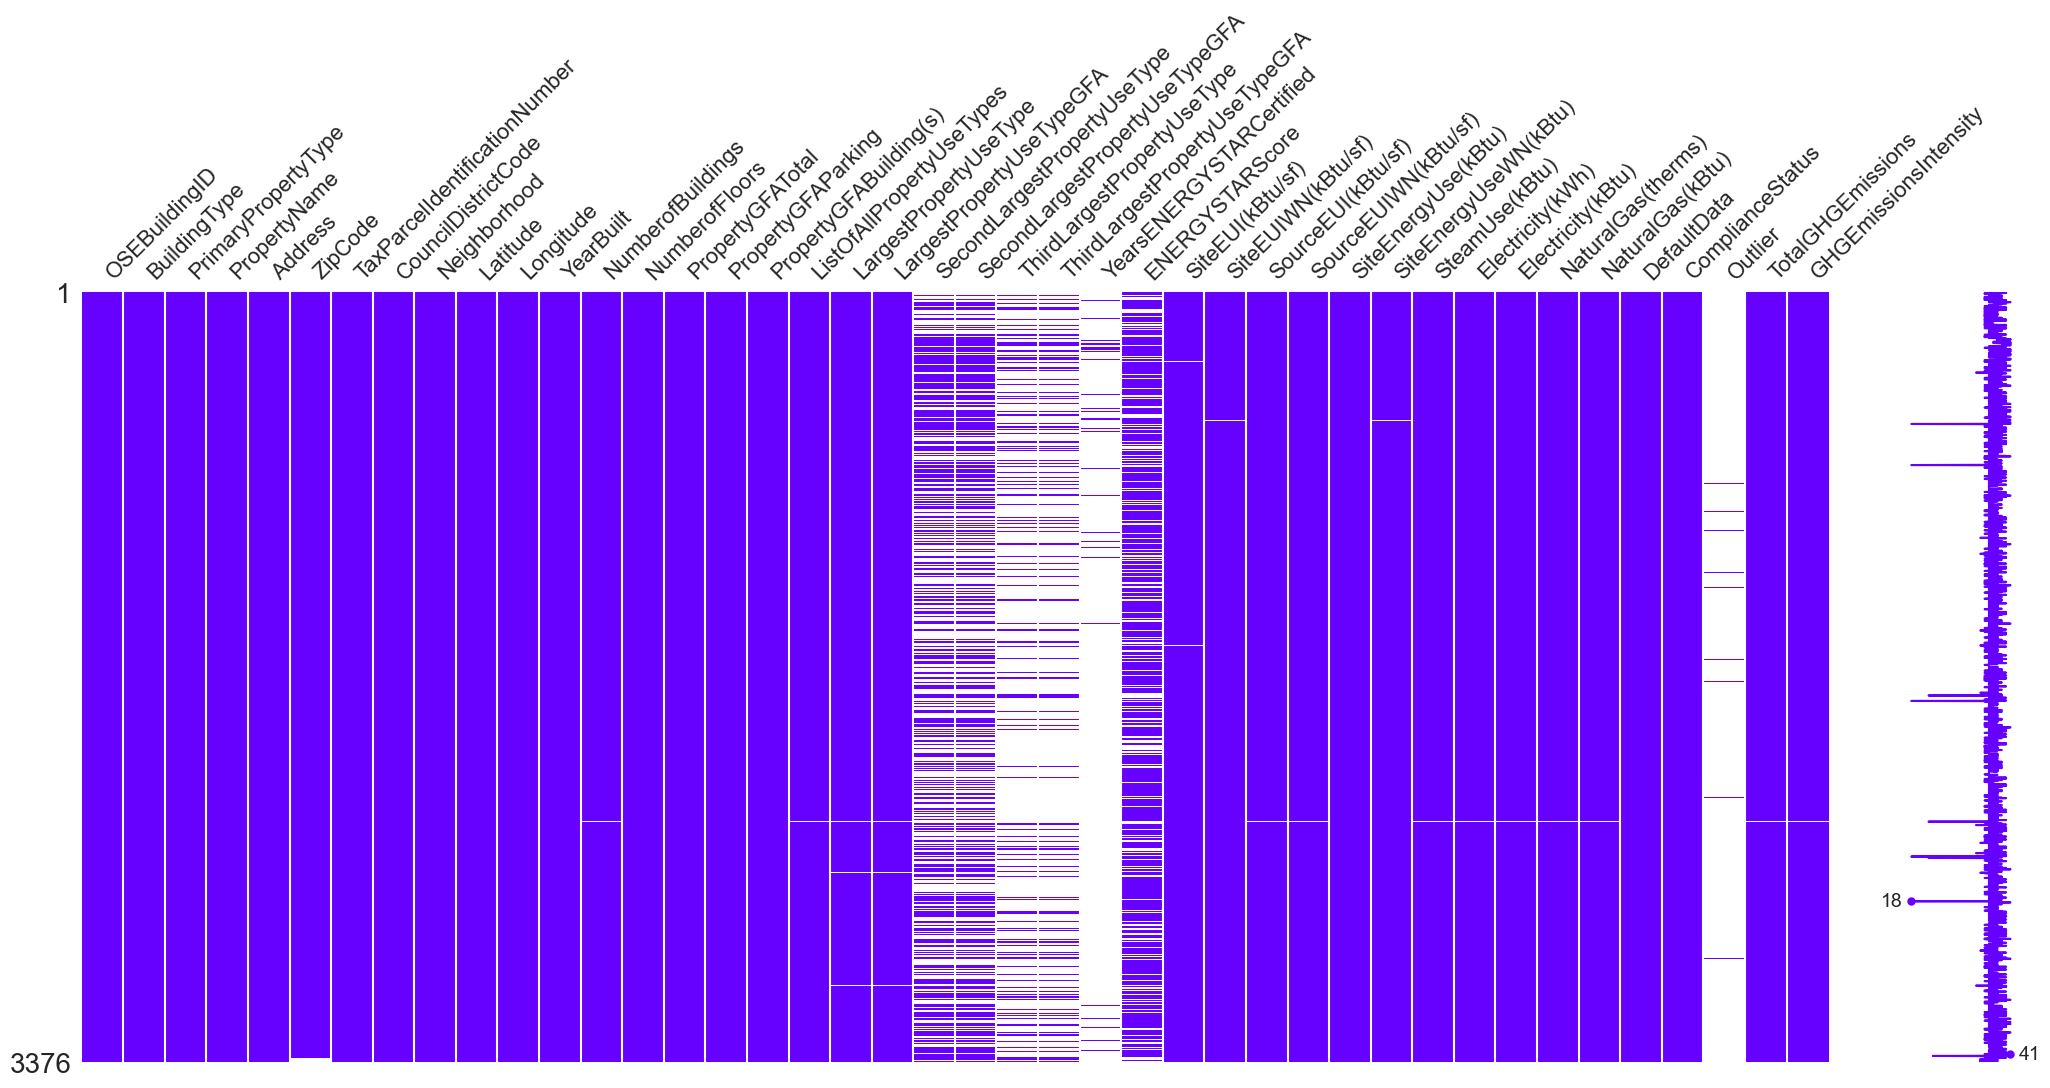

In [179]:
# Graphique des valeurs nulles

import missingno as msno
%matplotlib inline
msno.matrix(df,color=(0.4,0,1))

In [180]:

df["Outlier"].value_counts()

Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

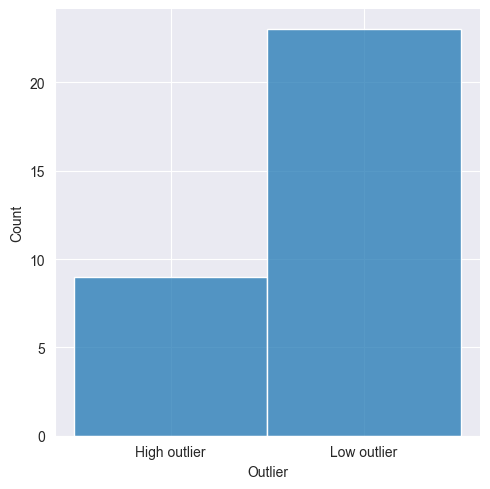

In [181]:
sns.displot(df, x="Outlier", binwidth=3)

In [182]:
df.YearsENERGYSTARCertified.isnull().sum()

3257

In [183]:
# Suppression de la colonne Outlier
df = df.drop(columns=["Outlier","YearsENERGYSTARCertified"])

In [184]:
df[["SecondLargestPropertyUseType","SecondLargestPropertyUseTypeGFA"]]

,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA
0,NaN,NaN
1,Parking,15064.0
2,NaN,NaN
3,NaN,NaN
4,Parking,68009.0
...,...,...
3371,NaN,NaN
3372,NaN,NaN
3373,Fitness Center/Health Club/Gym,5574.0
3374,Fitness Center/Health Club/Gym,6501.0


In [185]:
len(df.SecondLargestPropertyUseType.unique())

51

In [186]:
# Remplacement des valeurs nulles des 2 colonnes par 0

df.loc[df["SecondLargestPropertyUseTypeGFA"].isnull(), 'SecondLargestPropertyUseTypeGFA'] = 0
df.loc[df["ThirdLargestPropertyUseTypeGFA"].isnull(), 'ThirdLargestPropertyUseTypeGFA'] = 0

In [187]:
len(df["Address"].unique())

3354

In [188]:
# Affichages des doublons de la variable adresse
df[df.Address.duplicated()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
136,224,NonResidential,Retail Store,Westwood Village - Building B,2600 SW Barton St,98126.0,3624039009,1,DELRIDGE,47.52254,...,9.589728e+06,0.0,7.690803e+05,2.624102e+06,66061.210940,6606121.0,False,Compliant,369.14,5.45
157,248,Nonresidential COS,Warehouse,SCL SSC Building B,3613 4th Ave S,98134.0,7666205660,2,GREATER DUWAMISH,47.57199,...,4.327564e+06,0.0,1.151435e+06,3.928695e+06,0.000000,0.0,False,Compliant,27.39,0.47
349,491,NonResidential,Small- and Mid-Sized Office,South Tower,100 West Harrison,98119.0,1989200740,7,MAGNOLIA / QUEEN ANNE,47.62224,...,3.705629e+06,0.0,1.023767e+06,3.493093e+06,0.000000,0.0,False,Compliant,24.35,0.28
582,779,NonResidential,Large Office,Administration Building,500 5TH AVE,98104.0,0942000920,7,DOWNTOWN,47.60290,...,1.616201e+07,4047481.0,3.289862e+06,1.122501e+07,0.000000,0.0,False,Compliant,390.67,1.74
587,785,Nonresidential COS,Other,Airport Way Ctr - Bldg A,2203 Airport Way S,98134.0,7666203240,2,GREATER DUWAMISH,47.58290,...,1.452216e+07,0.0,3.741538e+06,1.276613e+07,17030.980470,1703098.0,False,Compliant,179.45,1.81
697,19654,NonResidential,Laboratory,1100 Olive Lab,1100 Olive Way,98101.0,0660002030,7,DOWNTOWN,47.61597,...,7.251589e+06,0.0,2.125319e+06,7.251588e+06,0.000000,0.0,False,Compliant,50.55,1.13
1436,21794,NonResidential,K-12 School,Peyton,2400 11th Ave East,98102.0,2025049007,3,EAST,47.64132,...,2.699616e+06,0.0,3.706718e+05,1.264732e+06,12133.129880,1213313.0,False,Compliant,73.26,1.68
1923,23835,NonResidential,Small- and Mid-Sized Office,South Seattle Business Park - Bldg B,4636 East Marginal Way South,98134.0,3573200250,2,GREATER DUWAMISH,47.56121,...,1.175915e+06,0.0,3.178645e+05,1.084554e+06,0.000000,0.0,False,Compliant,7.56,0.32
1969,23975,Nonresidential COS,Warehouse,Airport Way Ctr - Bldg D,2203 Airport Way S,98134.0,7666203240,2,GREATER DUWAMISH,47.58290,...,8.593872e+05,0.0,1.212340e+05,4.136500e+05,3504.440186,350444.0,False,Compliant,21.50,0.94
1970,23976,Nonresidential COS,Mixed Use Property,Airport Way Ctr - Bldg E,2203 Airport Way S,98134.0,7666203240,2,GREATER DUWAMISH,47.58290,...,4.649041e+06,0.0,4.609156e+05,1.572644e+06,27510.277340,2751028.0,False,Compliant,157.07,6.80


In [189]:
df[df.duplicated()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity


In [190]:
# Création d'un df constitué uniquement des "float"
df_float = df.select_dtypes(include=('float' or 'int'))

In [191]:
df_float

,ZipCode,Latitude,Longitude,NumberofBuildings,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,98101.0,47.61220,-122.33799,1.0,88434.0,0.0,0.0,60.0,81.699997,84.300003,...,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83
1,98101.0,47.61317,-122.33393,1.0,83880.0,15064.0,4622.0,61.0,94.800003,97.900002,...,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86
2,98101.0,47.61393,-122.33810,1.0,756493.0,0.0,0.0,43.0,96.000000,97.699997,...,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19
3,98101.0,47.61412,-122.33664,1.0,61320.0,0.0,0.0,56.0,110.800003,113.300003,...,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67
4,98121.0,47.61375,-122.34047,1.0,123445.0,68009.0,0.0,75.0,114.800003,118.699997,...,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,NaN,47.56722,-122.31154,1.0,12294.0,0.0,0.0,46.0,69.099998,76.699997,...,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70
3372,NaN,47.59625,-122.32283,1.0,16000.0,0.0,0.0,NaN,59.400002,65.900002,...,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01
3373,NaN,47.63644,-122.35784,1.0,7583.0,5574.0,0.0,NaN,438.200012,460.100006,...,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99
3374,NaN,47.52832,-122.32431,1.0,6601.0,6501.0,484.0,NaN,51.000000,55.500000,...,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57


In [192]:
df.ZipCode.unique()

array([98101., 98121., 98104., 98154., 98118., 98105., 98112., 98125.,
       98109., 98070., 98108., 98199., 98115., 98107., 98144., 98103.,
       98119., 98136., 98122., 98126., 98133., 98146., 98033., 98106.,
       98111., 98134., 98117., 98116., 98191., 98164., 98195., 98185.,
       98181., 98102., 98168., 98155., 98006., 98124., 98053., 98012.,
       98013., 98028., 98178., 98114., 98127., 98165., 98011., 98198.,
       98113., 98040., 98204., 98177., 98020., 98272., 98145.,    nan])

In [193]:
df=df.astype({"ZipCode":str,"CouncilDistrictCode":str})

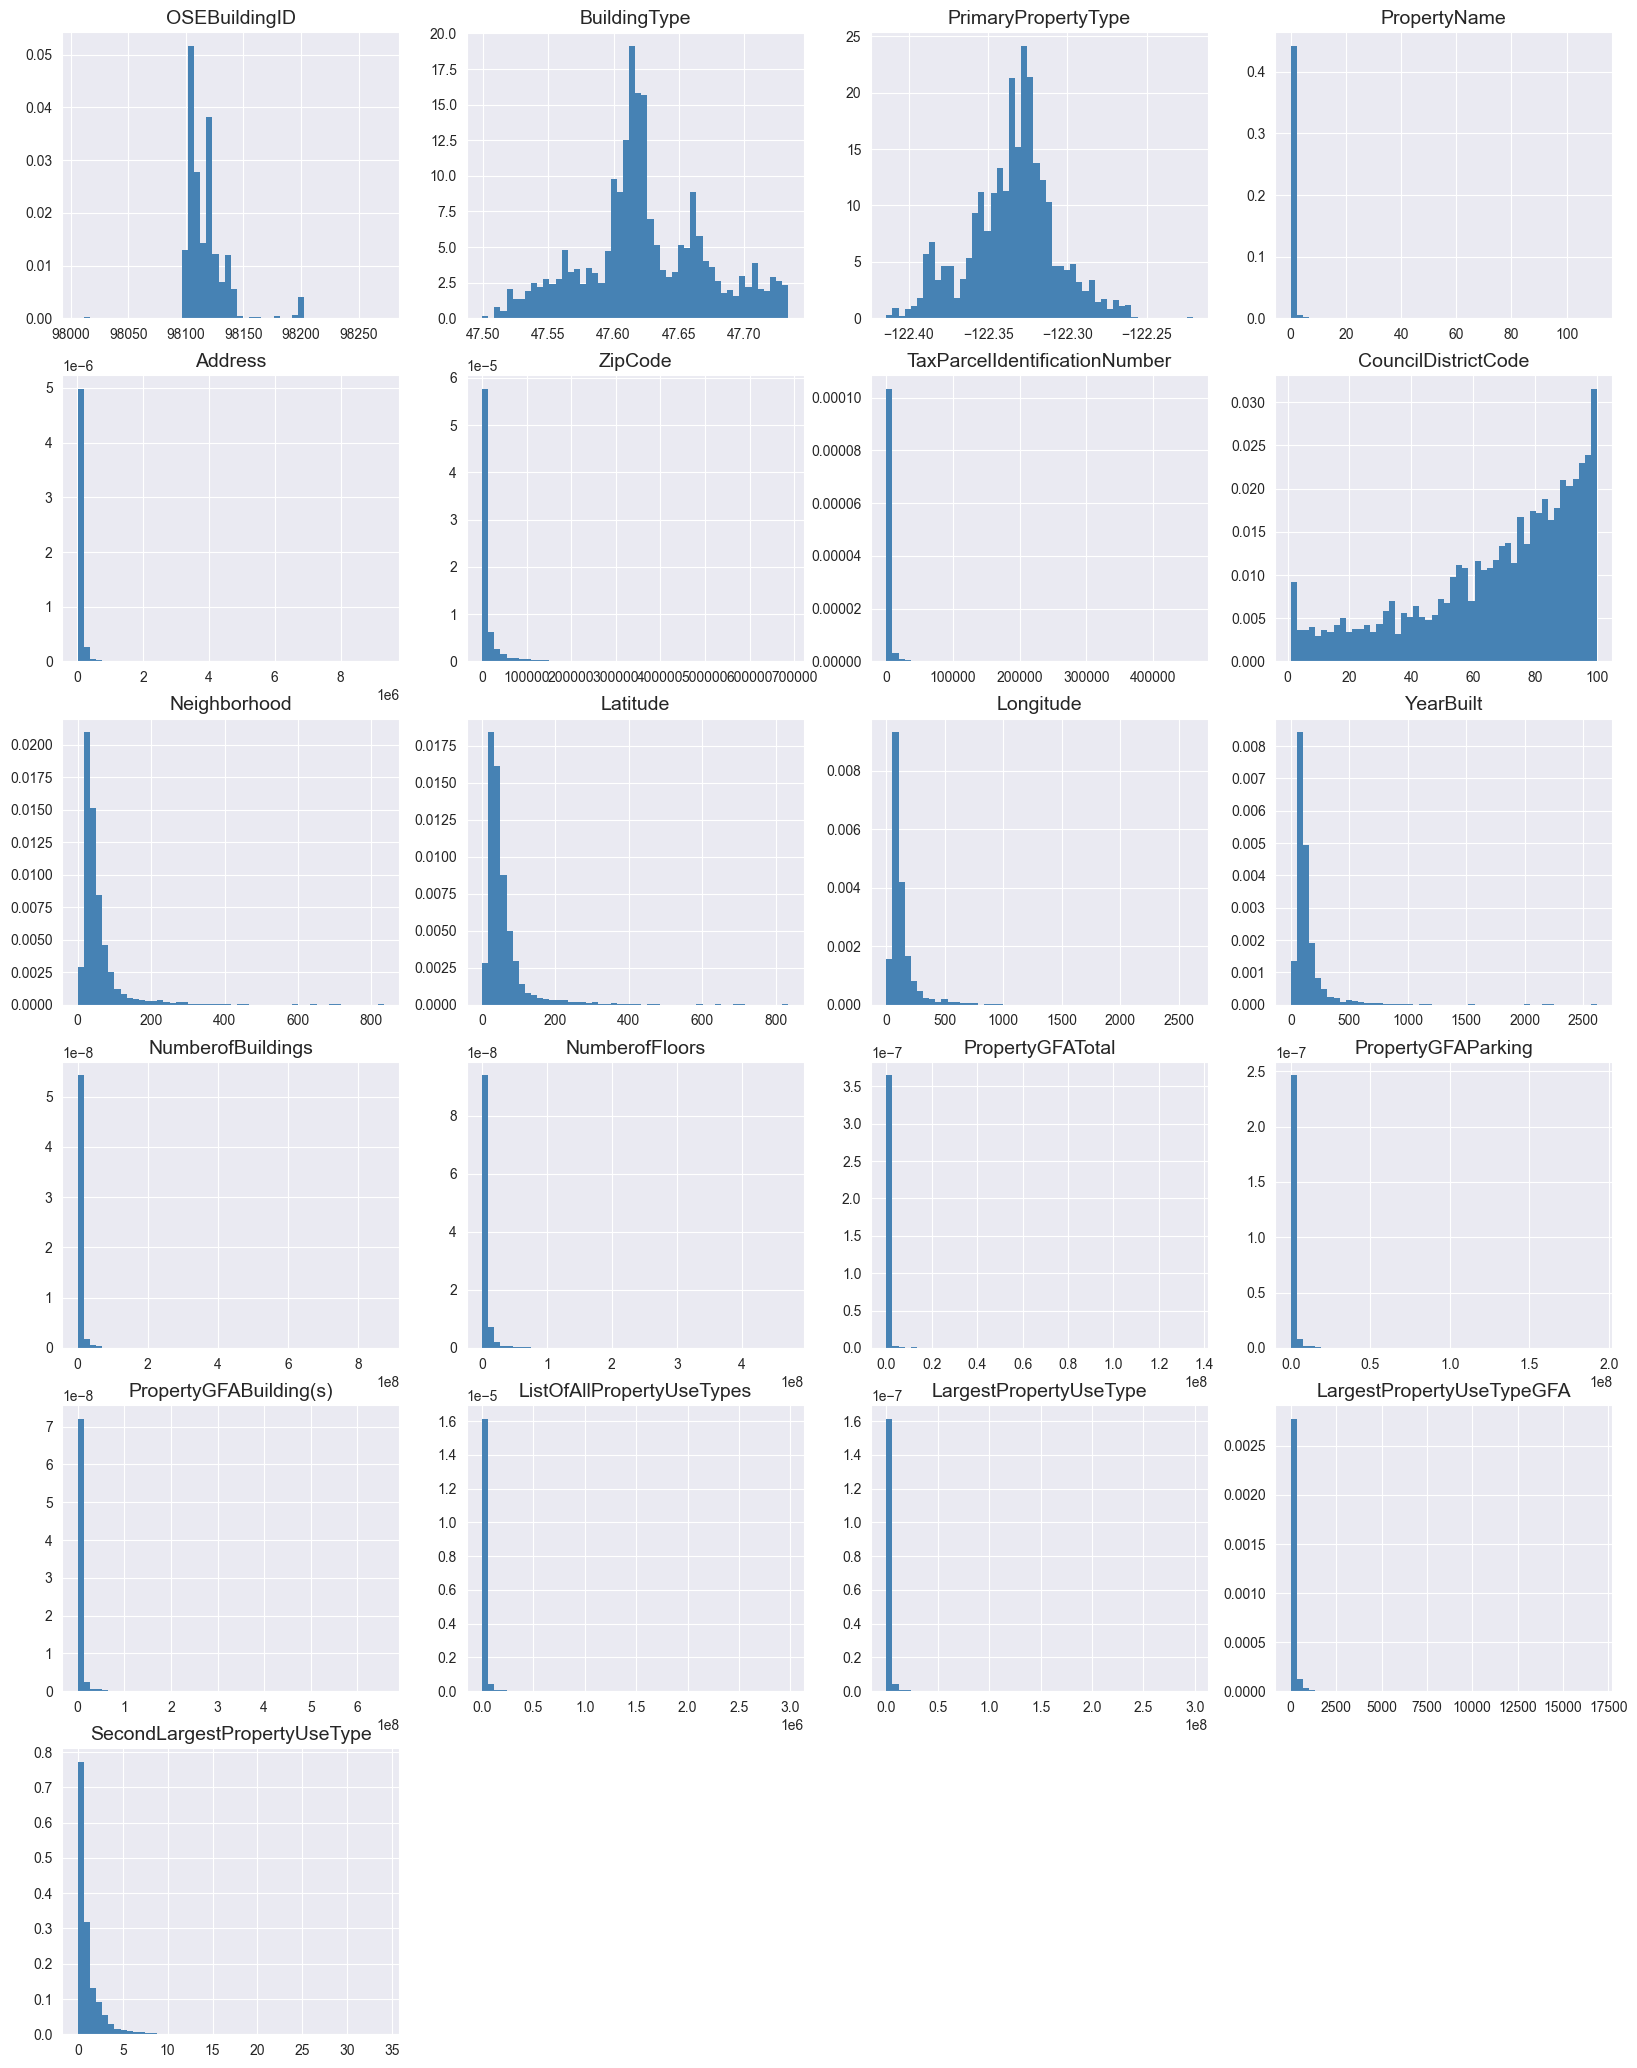

In [194]:
# Histogramme des variables numériques

X = df_float.values
fig = plt.figure(figsize=(20, 26))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(6,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(df.columns[feat_idx], fontsize=14)

In [195]:
df.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [196]:
df_objet = df.select_dtypes(include='object')

In [197]:
df_objet

,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,ComplianceStatus
0,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,Hotel,Hotel,NaN,NaN,Compliant
1,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,Compliant
2,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,Hotel,Hotel,NaN,NaN,Compliant
3,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,Hotel,Hotel,NaN,NaN,Compliant
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,Compliant
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,nan,1624049080,2,GREATER DUWAMISH,Office,Office,NaN,NaN,Error - Correct Default Data
3372,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,nan,3558300000,2,DOWNTOWN,Other - Recreation,Other - Recreation,NaN,NaN,Compliant
3373,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,nan,1794501150,7,MAGNOLIA / QUEEN ANNE,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,Compliant
3374,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,nan,7883603155,1,GREATER DUWAMISH,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,Compliant


In [198]:
len(df.PropertyGFATotal.unique())

3195

In [199]:
df_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ZipCode                          3360 non-null   float64
 1   Latitude                         3376 non-null   float64
 2   Longitude                        3376 non-null   float64
 3   NumberofBuildings                3368 non-null   float64
 4   LargestPropertyUseTypeGFA        3356 non-null   float64
 5   SecondLargestPropertyUseTypeGFA  3376 non-null   float64
 6   ThirdLargestPropertyUseTypeGFA   3376 non-null   float64
 7   ENERGYSTARScore                  2533 non-null   float64
 8   SiteEUI(kBtu/sf)                 3369 non-null   float64
 9   SiteEUIWN(kBtu/sf)               3370 non-null   float64
 10  SourceEUI(kBtu/sf)               3367 non-null   float64
 11  SourceEUIWN(kBtu/sf)             3367 non-null   float64
 12  SiteEnergyUse(kBtu) 

## Représentation graphique des variables de consommation d'énergie par type de bâtiment

In [200]:
def diag_bar(df,var_1,var_2):
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.barplot(data=df,x=var_1,y=var_2,color = 'b')
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

C:\Users\fbbou\PycharmProjects\O-C\Projet_4\venv\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


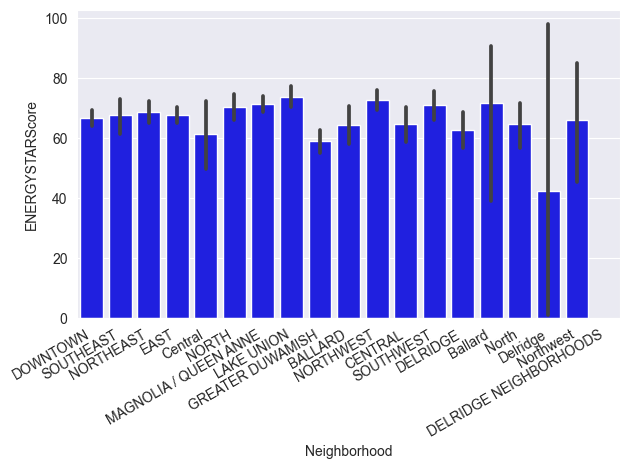

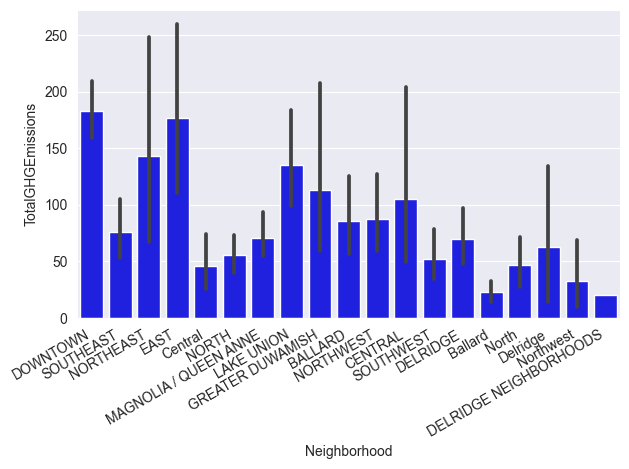

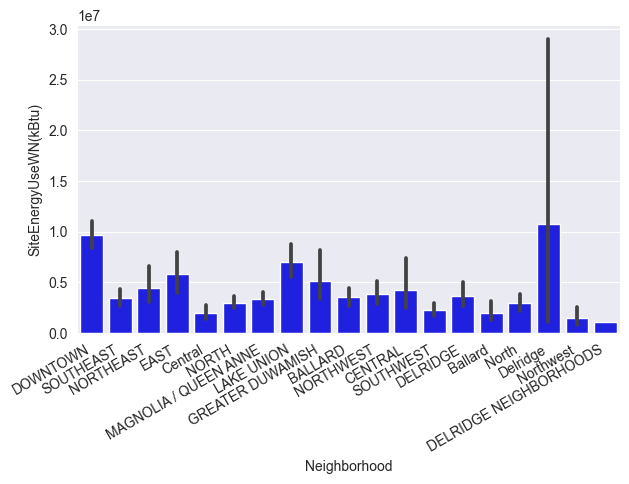

In [201]:
list_var_num=["ENERGYSTARScore","TotalGHGEmissions","SiteEnergyUseWN(kBtu)"]
list_var_mod=["Neighborhood","BuildingType","PrimaryPropertyType"]
for num in range(0,3):
    diag_bar(df,"Neighborhood",list_var_num[num])

C:\Users\fbbou\PycharmProjects\O-C\Projet_4\venv\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


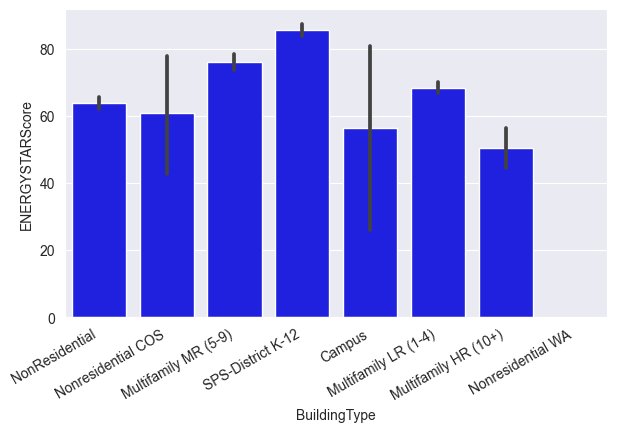

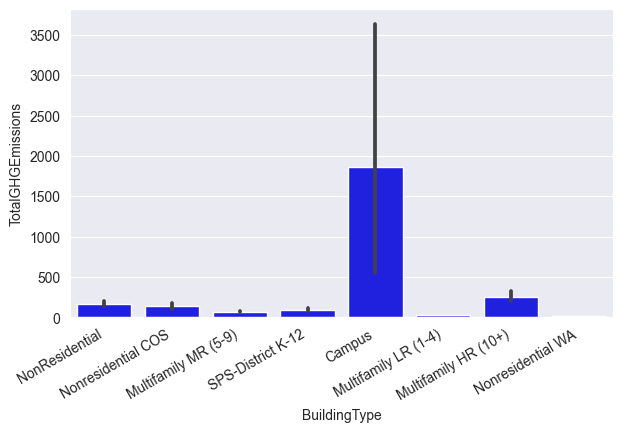

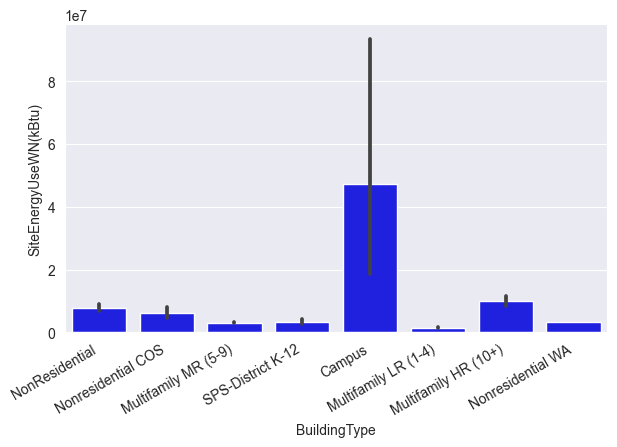

In [202]:
list_var_num=["ENERGYSTARScore","TotalGHGEmissions","SiteEnergyUseWN(kBtu)"]
list_var_mod=["Neighborhood","BuildingType","PrimaryPropertyType"]
for num in range(0,3):
    diag_bar(df,"BuildingType",list_var_num[num])

C:\Users\fbbou\PycharmProjects\O-C\Projet_4\venv\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\fbbou\PycharmProjects\O-C\Projet_4\venv\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\fbbou\PycharmProjects\O-C\Projet_4\venv\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\fbbou\PycharmProjects\O-C\Projet_4\venv\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\fbbou\PycharmProjects\O-C\Projet_4\venv\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\fbbou\PycharmProjects\O-C\Projet_4\venv\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN 

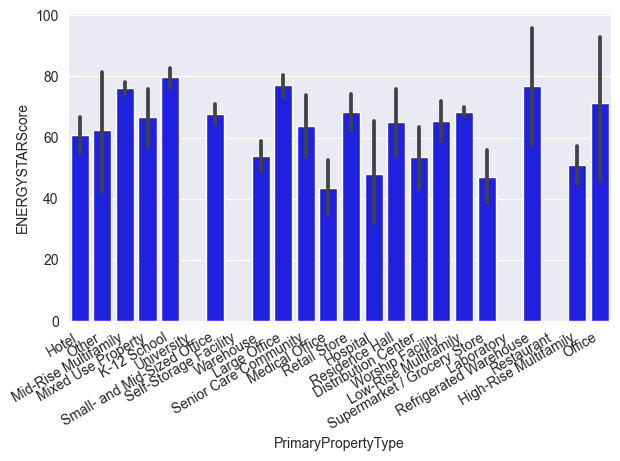

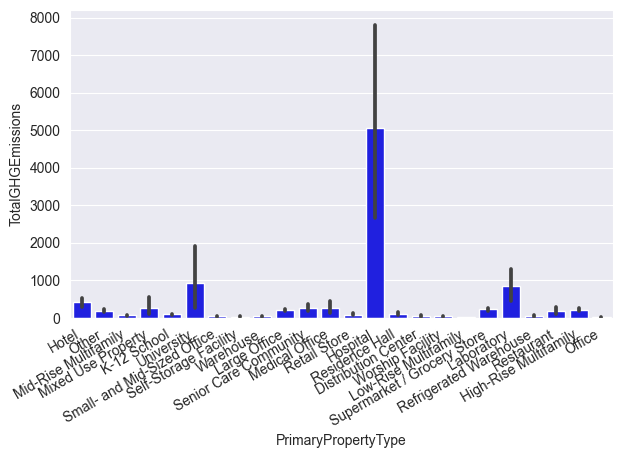

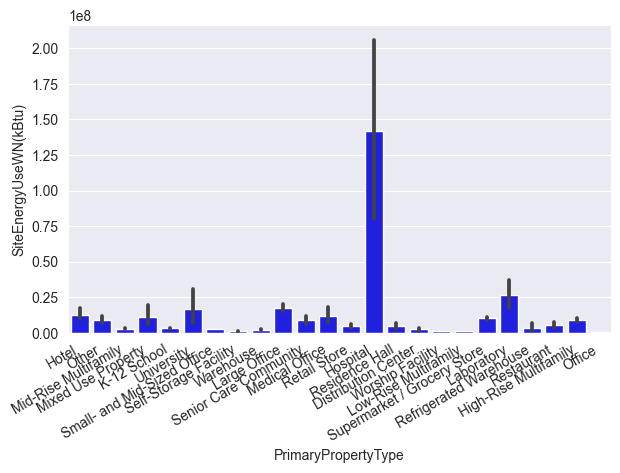

In [203]:
list_var_num=["ENERGYSTARScore","TotalGHGEmissions","SiteEnergyUseWN(kBtu)"]
list_var_mod=["Neighborhood","BuildingType","PrimaryPropertyType"]
for num in range(0,3):
    diag_bar(df,"PrimaryPropertyType",list_var_num[num])

## Consommation d'énergie moyenne par année d'ancienneté

In [204]:
df["years"]=2016-df["YearBuilt"]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

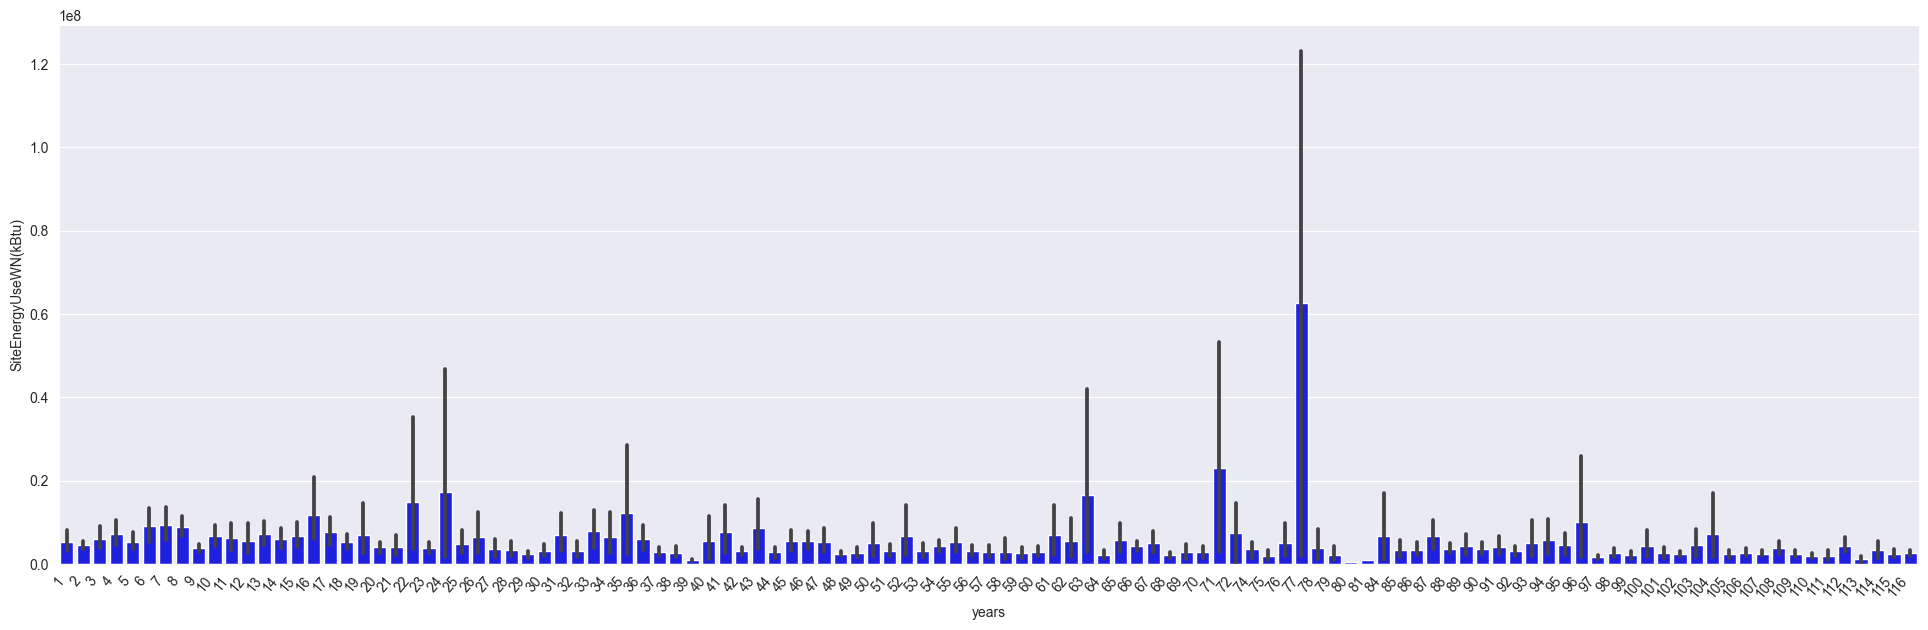

In [205]:
fig, ax = plt.subplots(figsize=(24, 7))
sns.barplot(data=df,x="years",y="SiteEnergyUseWN(kBtu)",color = 'b')
plt.setp(ax.get_xticklabels(), rotation=50, ha="right")

Text(0.5, 1.0, "Evolution de la consommation d'énergie sur 6 ans")

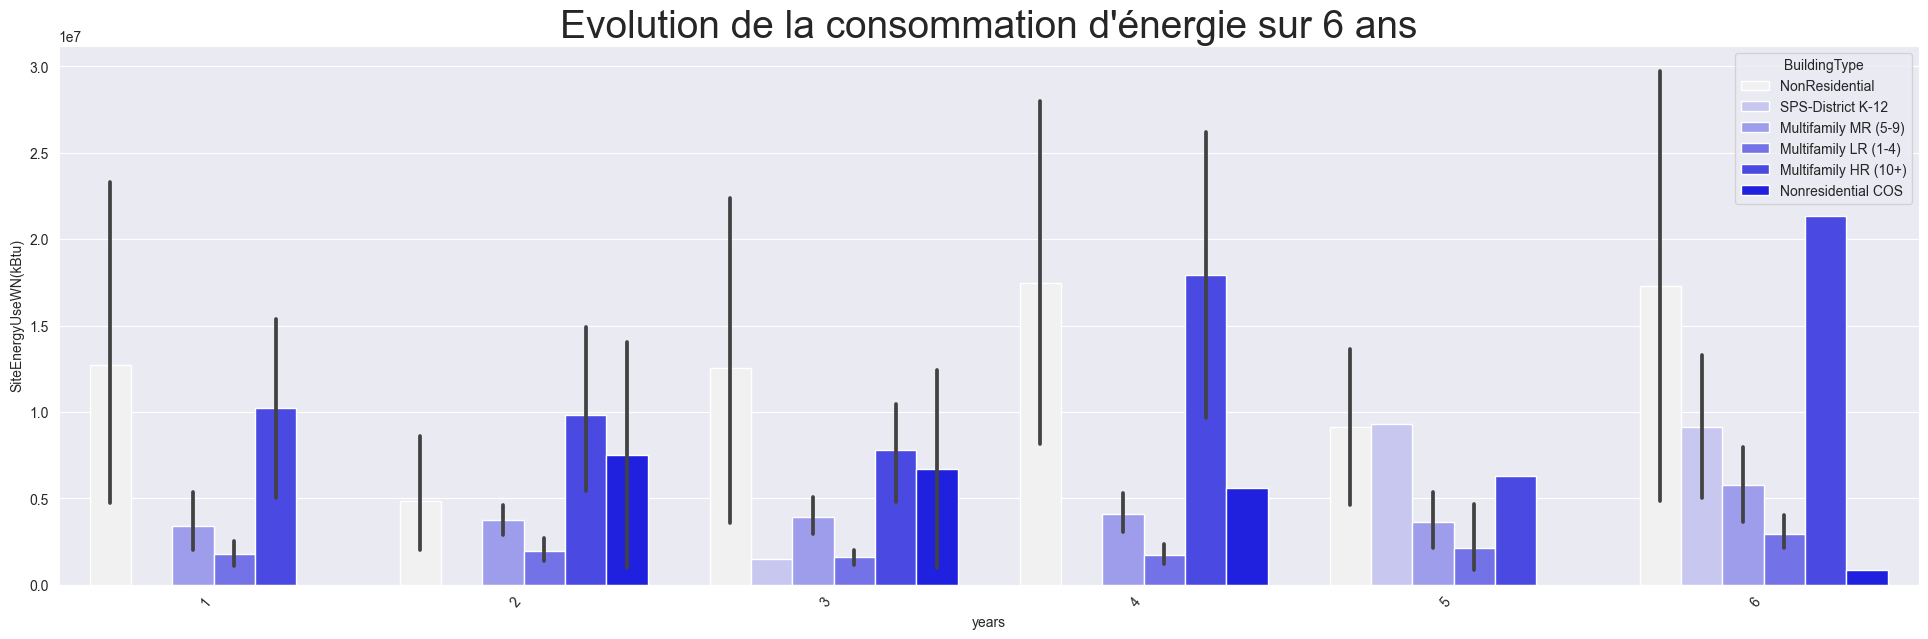

In [206]:
fig, ax = plt.subplots(figsize=(24, 7))
sns.barplot(data=df[df["years"]<7],x="years",y="SiteEnergyUseWN(kBtu)",color = 'b',hue="BuildingType")
plt.setp(ax.get_xticklabels(), rotation=50, ha="right")
plt.title("Evolution de la consommation d'énergie sur 6 ans",fontsize=28)

## Dispersion de la consommation d'énergie par type de bâtiment

In [207]:
# Filtre sur les bâtiments ayant une surconsommation
df[df["SiteEnergyUseWN(kBtu)"]>10_000_000].shape

(354, 41)

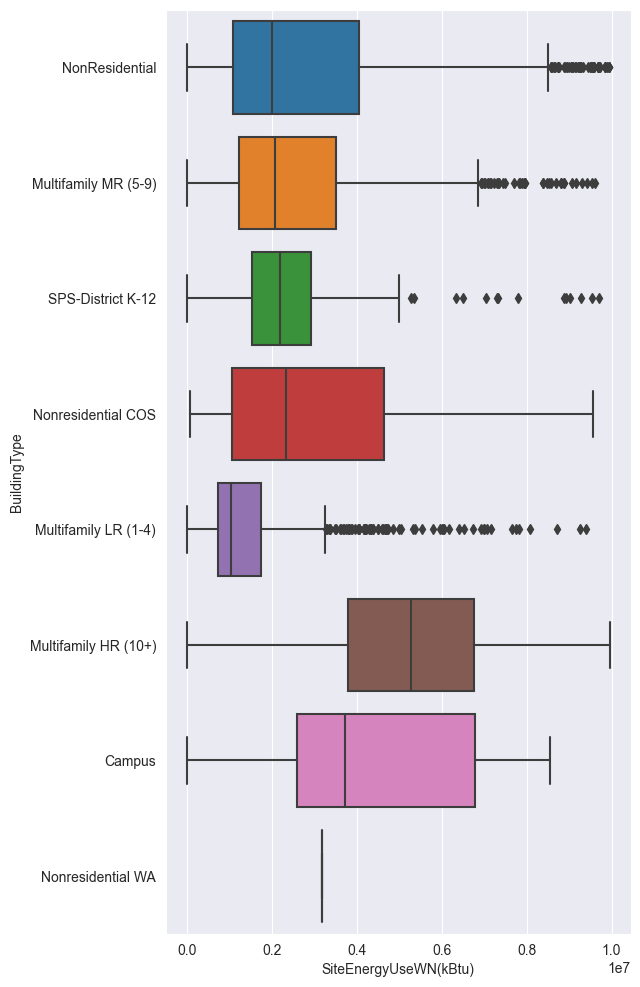

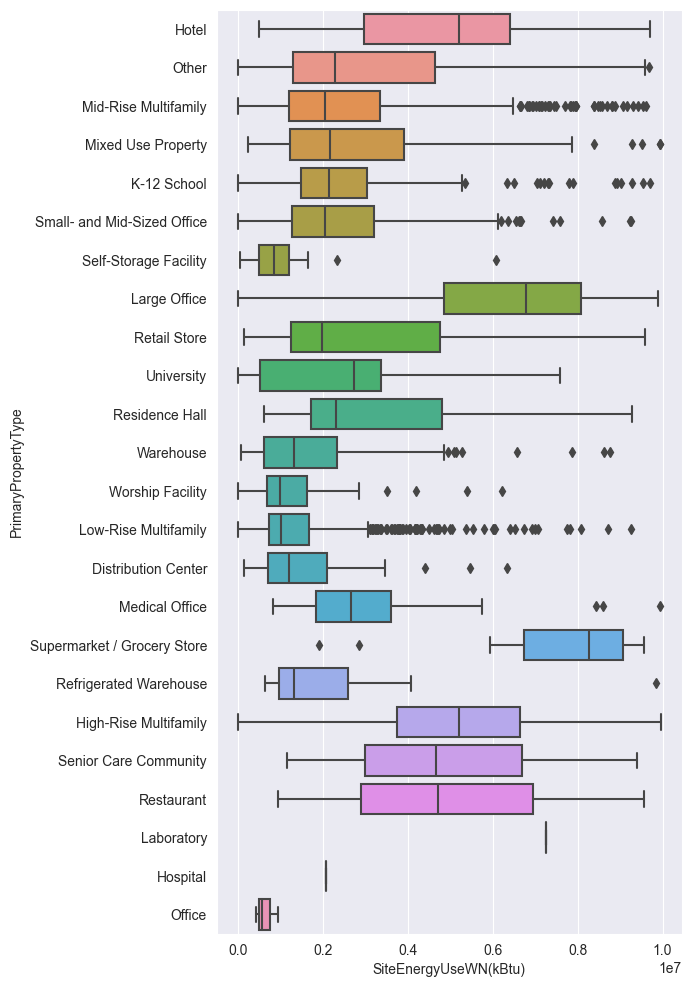

In [208]:
list_var_mod=["BuildingType","PrimaryPropertyType"]

for mod in list_var_mod:
    plt.figure(figsize = (6,12))
    sns.boxplot(data=df[df["SiteEnergyUseWN(kBtu)"]<10_000_000], x="SiteEnergyUseWN(kBtu)",y=mod)

## Consommation d'énergie en fonction du lieu géographique

Le DF est composé de 5 variable géographique:
1. Latitude
2. Longitude
3. ZipCode
4. CouncilDistrictCode
5. Neighborhood

<AxesSubplot: xlabel='Latitude', ylabel='SiteEnergyUseWN(kBtu)'>

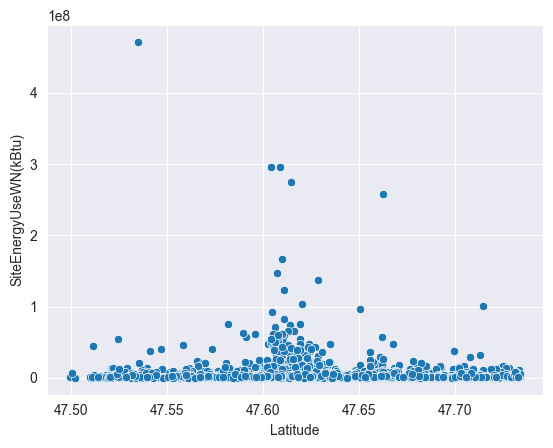

In [209]:
sns.scatterplot(data=df,x="Latitude",y="SiteEnergyUseWN(kBtu)")

<AxesSubplot: xlabel='Longitude', ylabel='SiteEnergyUseWN(kBtu)'>

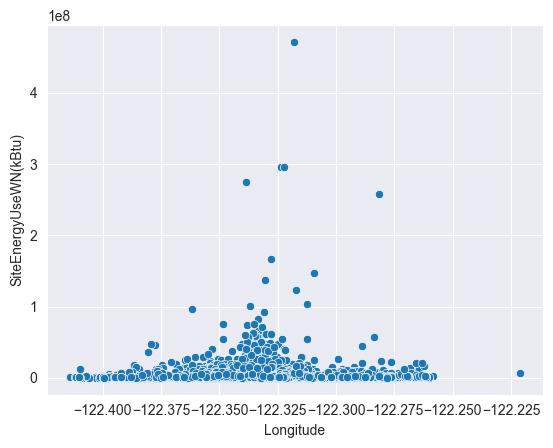

In [210]:
sns.scatterplot(data=df,x="Longitude",y="SiteEnergyUseWN(kBtu)")

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

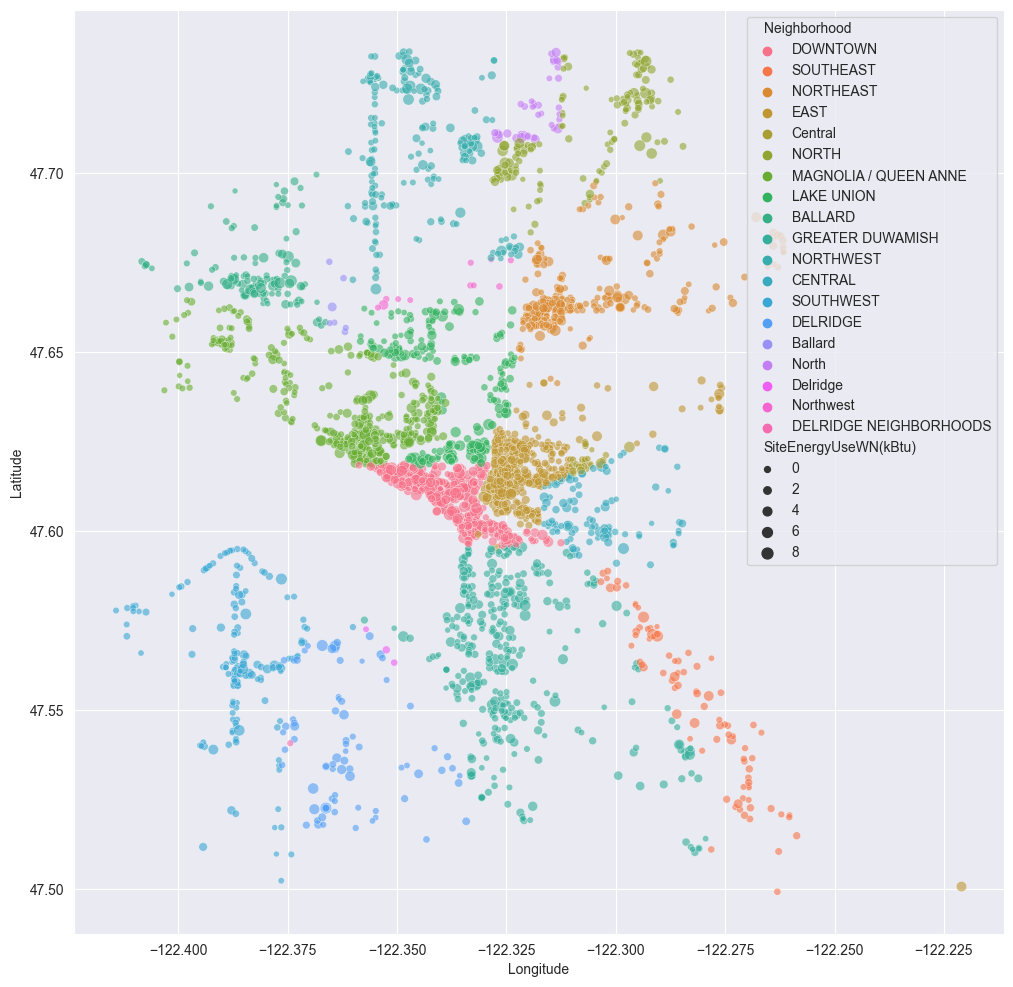

In [211]:
plt.figure(figsize = (12,12))
sns.scatterplot(data=df[df["SiteEnergyUseWN(kBtu)"]<10_000_000],x="Longitude",y="Latitude",hue="Neighborhood",
                size="SiteEnergyUseWN(kBtu)",alpha=0.6)

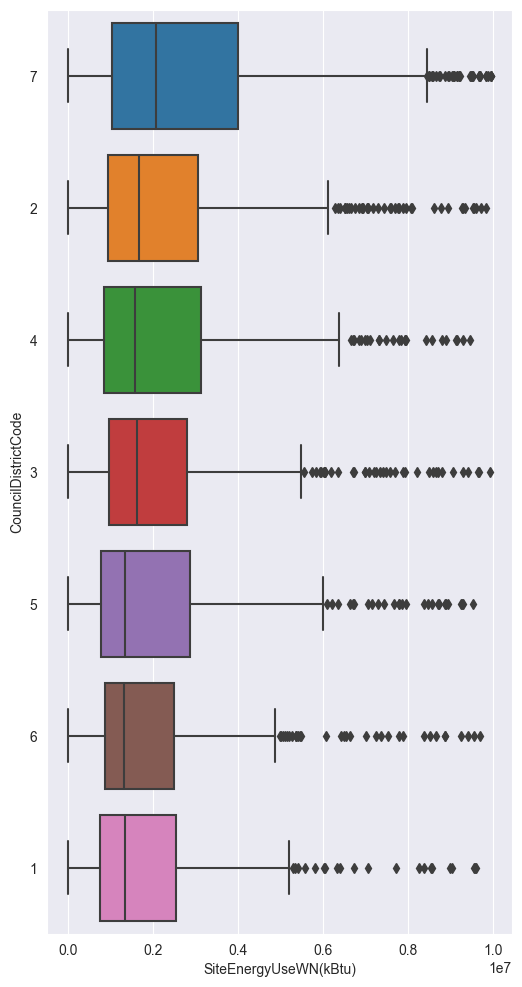

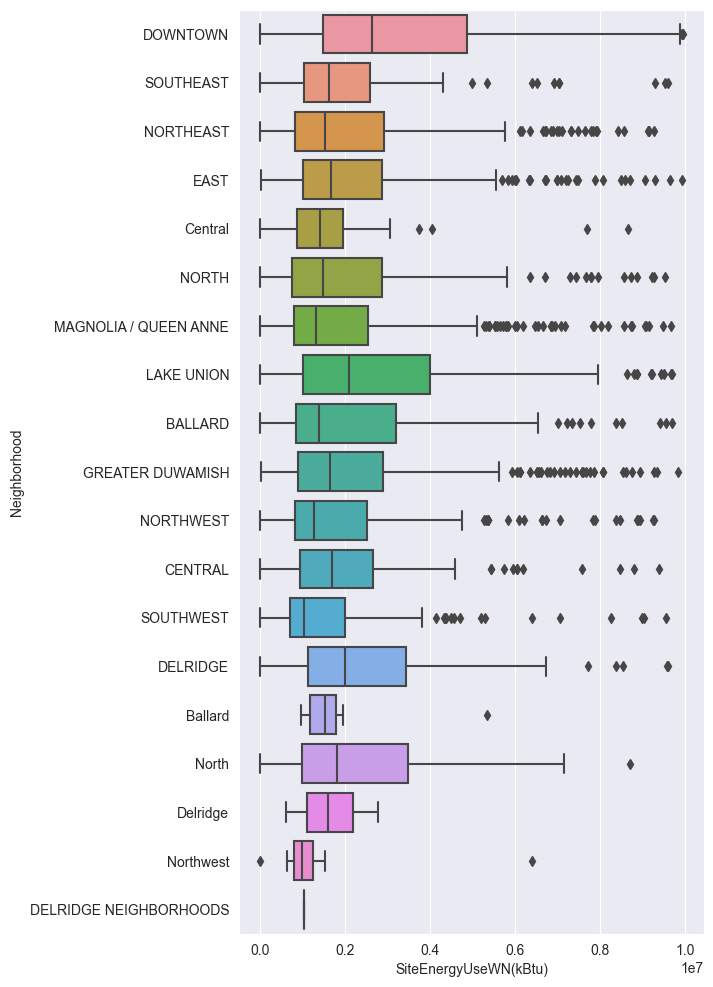

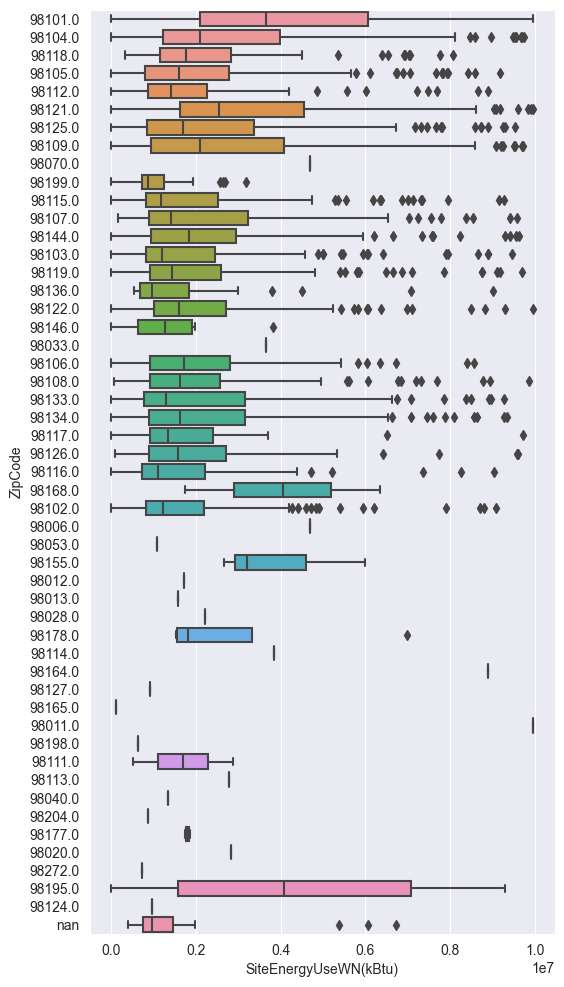

In [212]:
list_var_mod=["CouncilDistrictCode","Neighborhood","ZipCode"]

for mod in list_var_mod:
    plt.figure(figsize = (6,12))
    sns.boxplot(data=df[df["SiteEnergyUseWN(kBtu)"]<10_000_000], x="SiteEnergyUseWN(kBtu)",y=mod)

## Problème de sur-apprentissage à venir

#### Nombre de modalité totale trop élevé
Nous avons 3 variables décrit par :
24 modalités
8 modalités
19 modalités
soit 19x8x24=3648, plus que le nombre de lignes 3376

#### Colinéarité entre variable
La consommation totale est la somme de la consommation en électricité et en gaz
La surface totale d'un bien est la somme de chaque partie

In [213]:
# Nombre de lignes par modalités

df_mod = df[["PrimaryPropertyType","Neighborhood","BuildingType"]]

for col in df_mod.columns:
    print(df_mod[col].value_counts())

Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: PrimaryPropertyType, dtype: int64
DOWNTOWN                  573
EAST                      453
MAGNOLIA / QUEEN ANNE     423
GREATER DUWAMISH          375


## Emission de CO2 par la consommation d'énergie

<AxesSubplot: xlabel='TotalGHGEmissions', ylabel='SiteEnergyUseWN(kBtu)'>

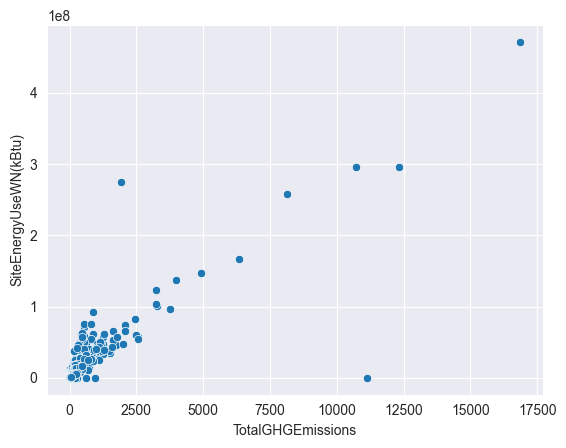

In [214]:
sns.scatterplot(data=df,x="TotalGHGEmissions",y="SiteEnergyUseWN(kBtu)")

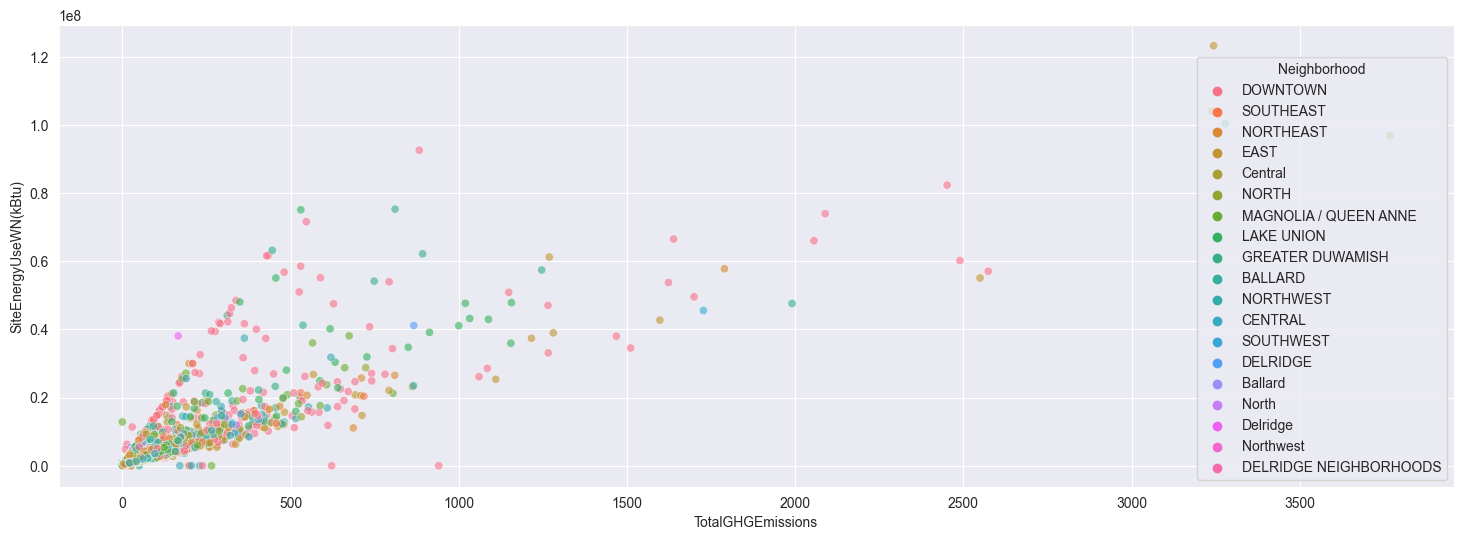

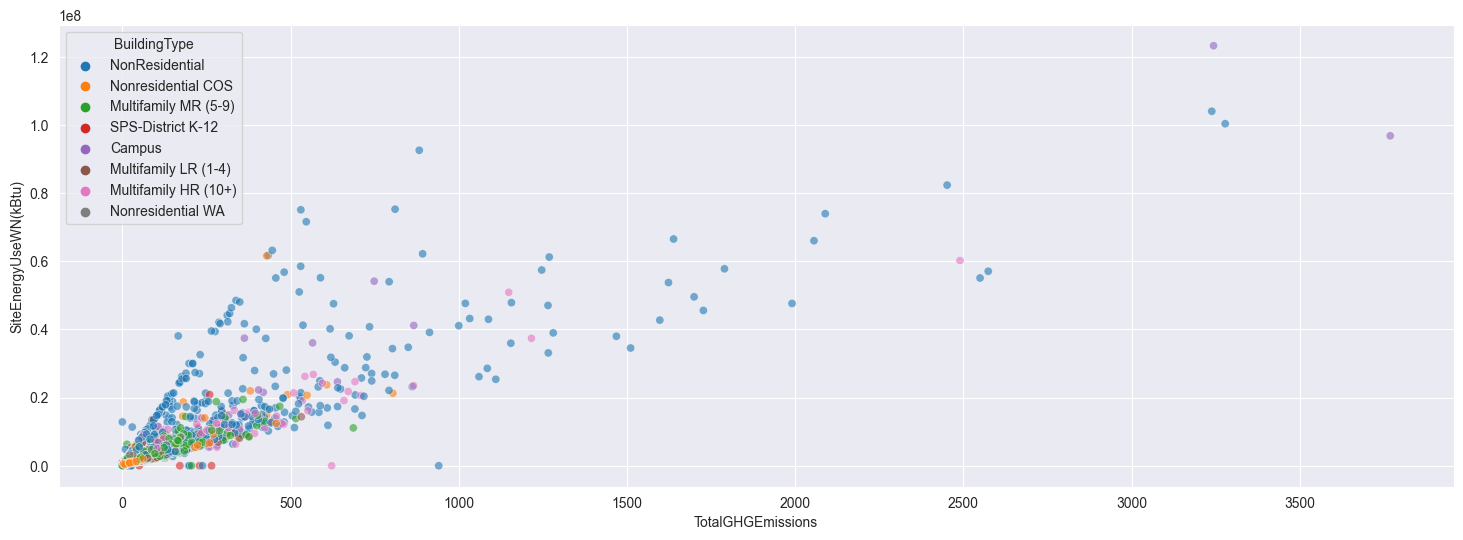

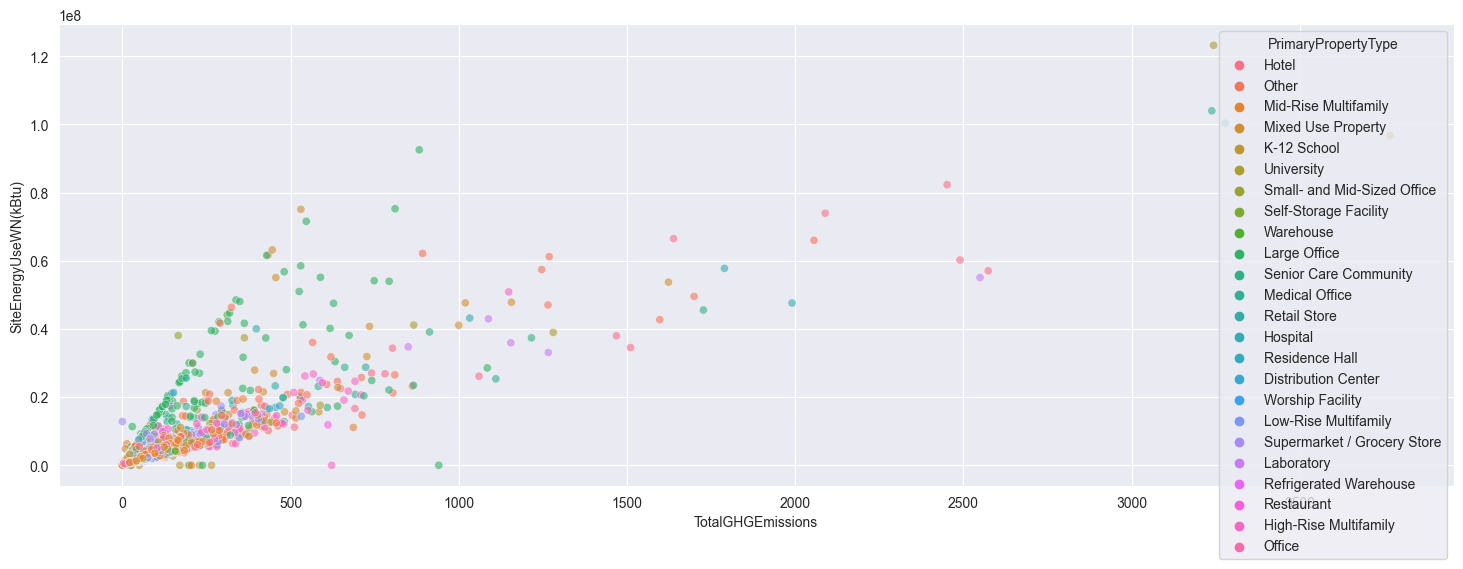

In [215]:
list_var_mod=["Neighborhood","BuildingType","PrimaryPropertyType"]

for mod in list_var_mod:
    plt.figure(figsize = (18,6))
    sns.scatterplot(data=df[(df["TotalGHGEmissions"]<7000)&(df["SiteEnergyUseWN(kBtu)"]<125_500_000)],
                    x="TotalGHGEmissions",y="SiteEnergyUseWN(kBtu)",hue=mod,alpha=0.6)

## Matrice des corrélations

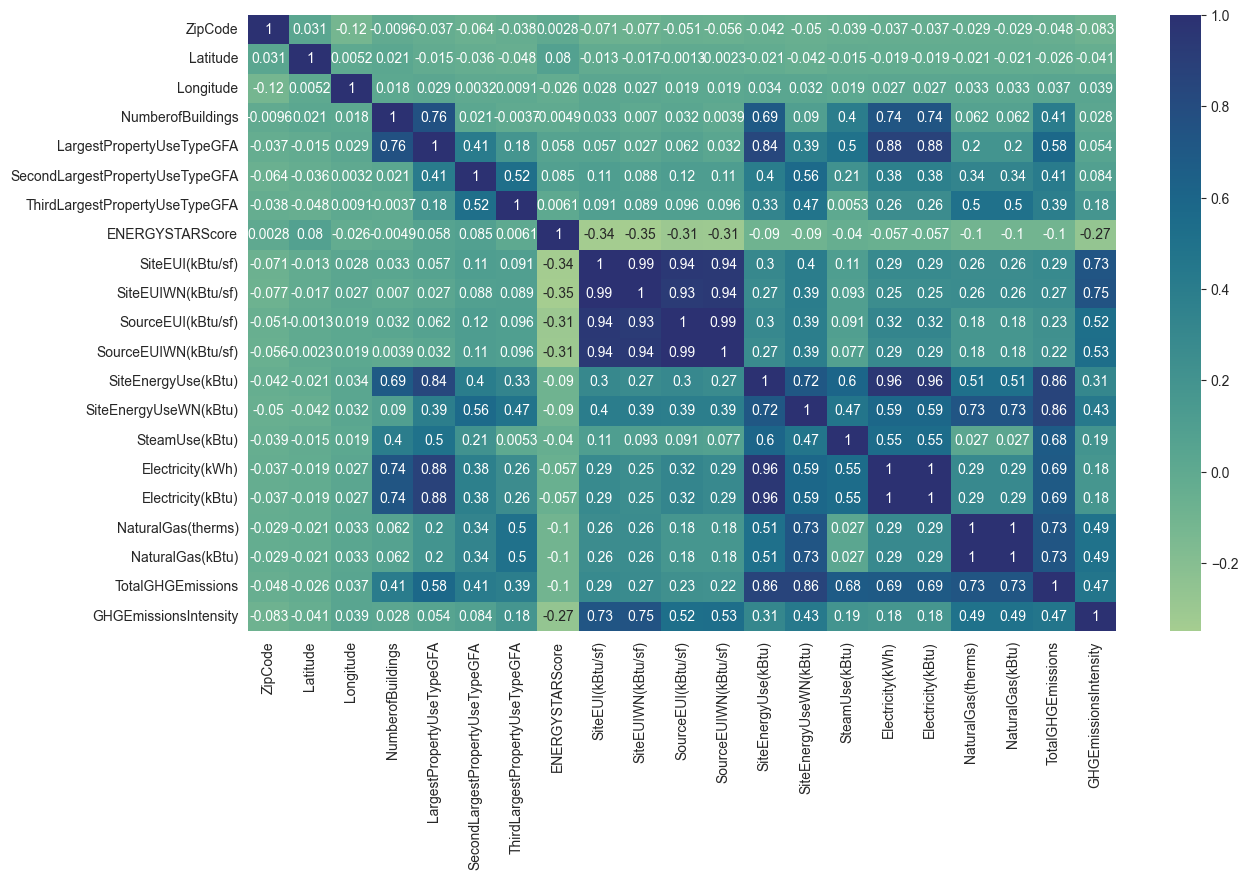

In [216]:
# Matrice de corrélation & heatmap

df_corr = df_float.corr(method='pearson')
plt.figure(figsize=(14, 8))
sns.heatmap(df_corr, annot=True,cmap="crest")
plt.show()

## Création des DF pour le Machine Learning

>Nous utilisons deux types d'algorithmes pour ML
>1) Régression linéaire multiple: le DF sera composé uniquement de float pour la prédiction d'énergie
>2) Forêt aléatoire et KNN : le DF sera composé de float et string

In [217]:
df_float=df[["years","Latitude","Longitude","NumberofFloors","NumberofBuildings","PropertyGFATotal","ENERGYSTARScore"]]

In [218]:
df_prev=df[["years","Latitude","Longitude","NumberofFloors","NumberofBuildings","PropertyGFATotal","ENERGYSTARScore",
            "Neighborhood","BuildingType","PrimaryPropertyType"]]

In [219]:
df["CouncilDistrictCode"].unique()

array(['7', '3', '2', '4', '5', '6', '1'], dtype=object)